 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv("../data/technical_support_data-2.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [2]:
tech_supp_df.shape

(23, 8)

In [3]:
tech_supp_df.head()


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


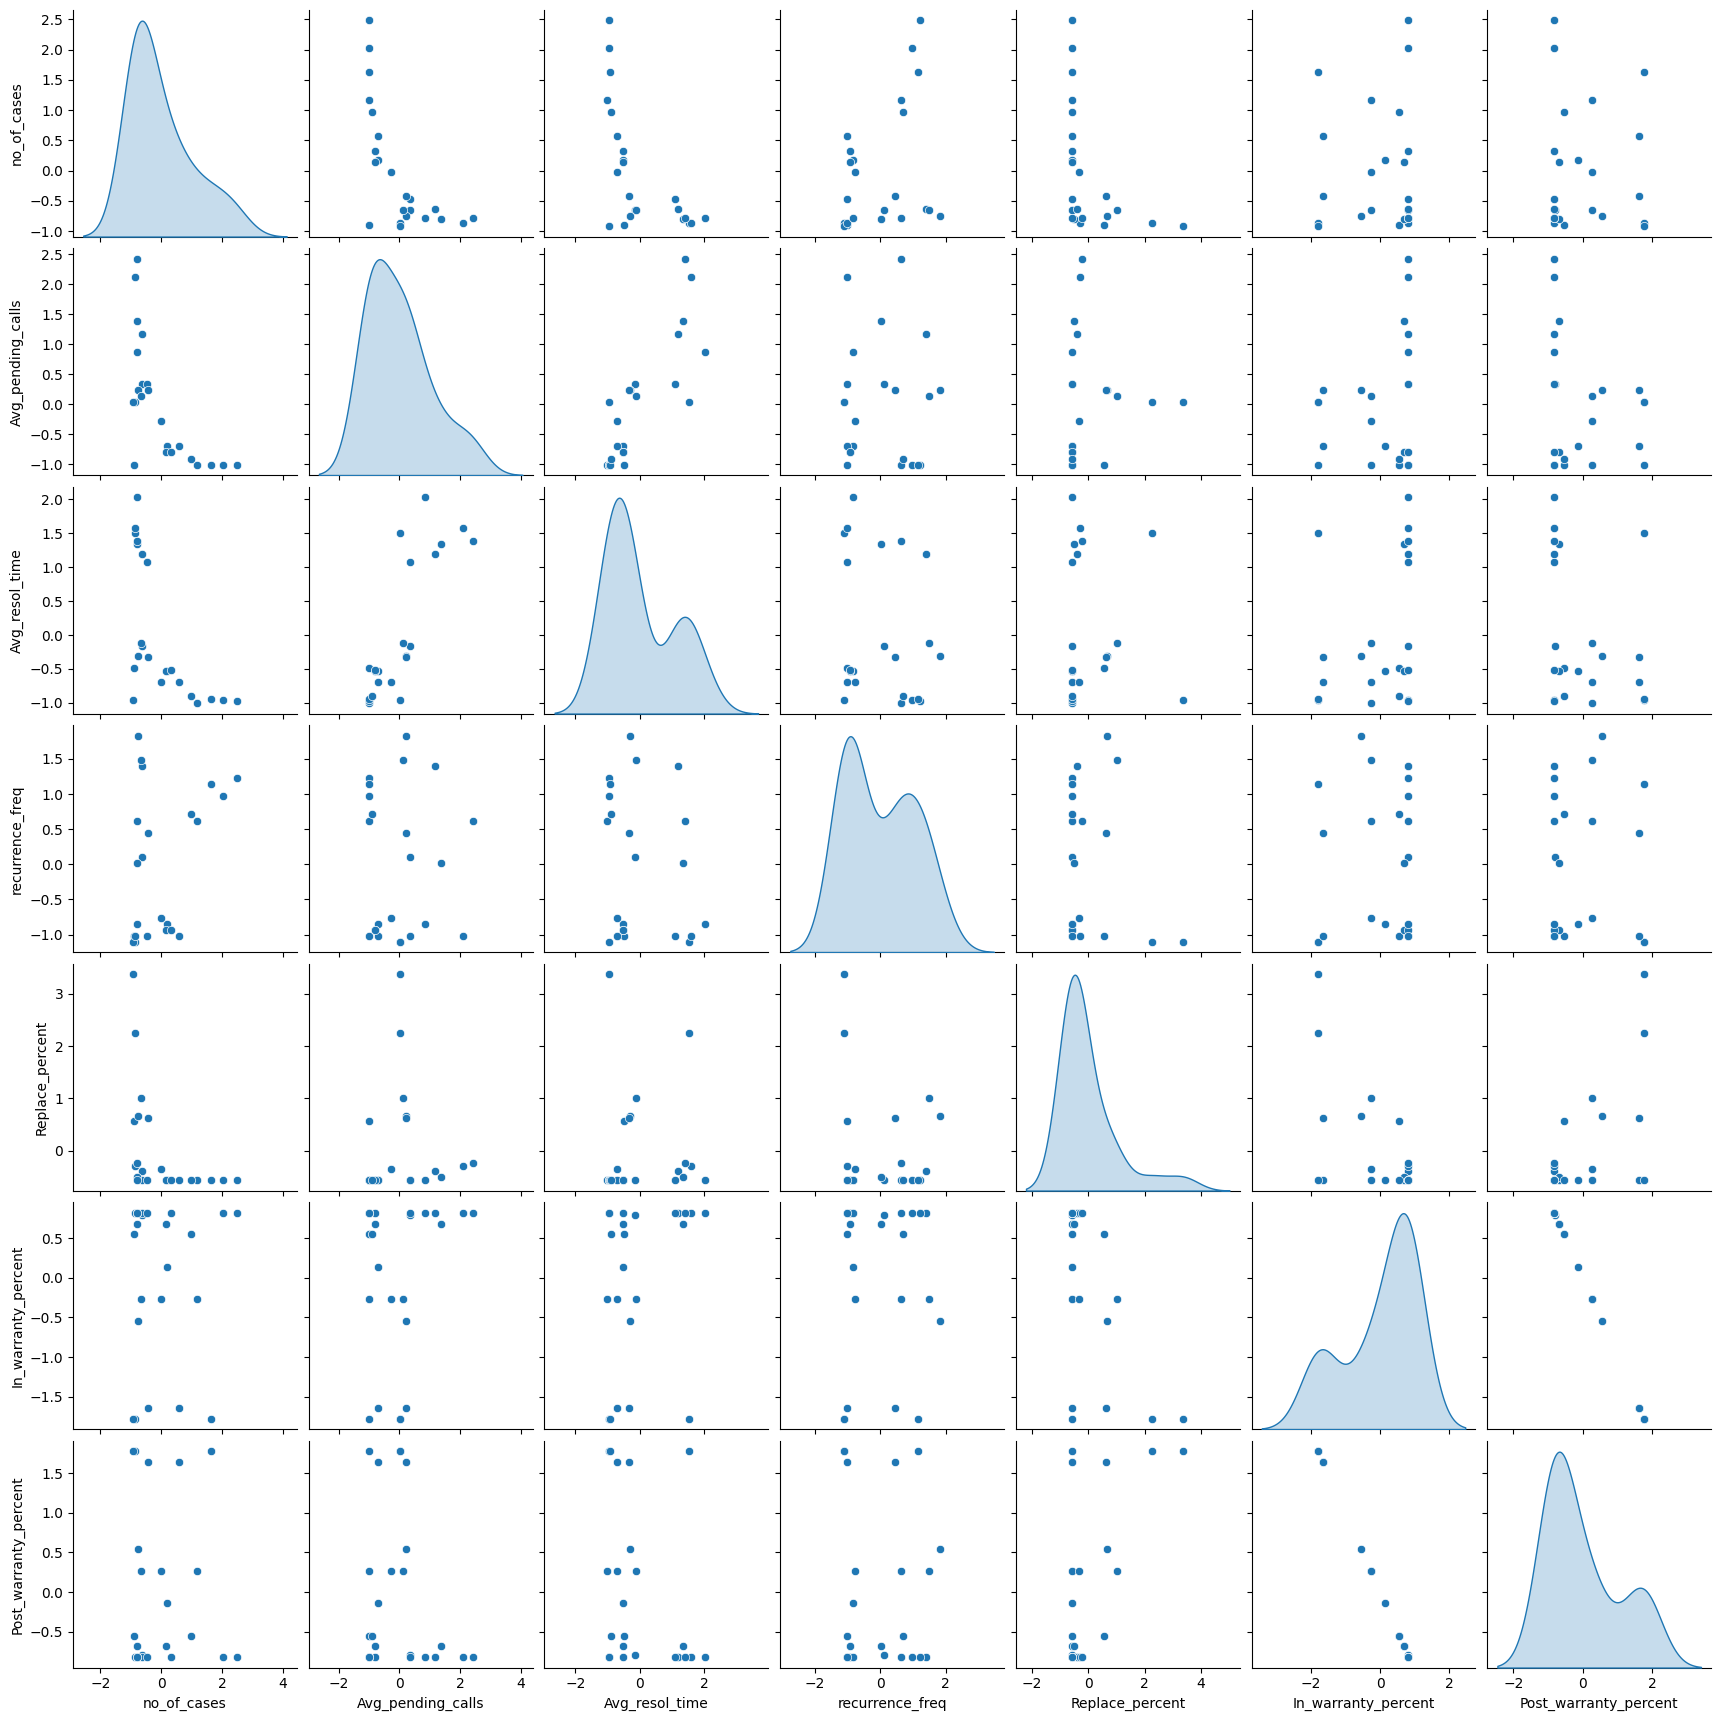

In [4]:
techSuppAttr=tech_supp_df.iloc[:,1:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

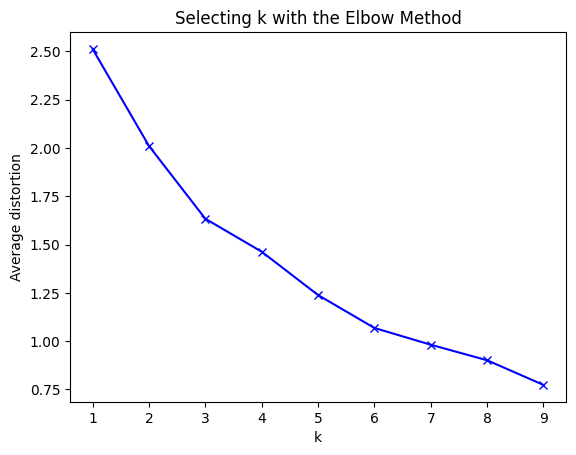

In [5]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [6]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.


Start Debugging 2 (preparation step pre Debugging 1)

In [7]:
# check datatype of GROUP column
tech_supp_df.groupby(['GROUP'])

In [8]:
tech_supp_df['GROUP'].head(3)

0    0
1    2
2    0
Name: GROUP, dtype: int32

Notes: (in |#| out)<br>
_____ tech_supp_df.groupby(['GROUP']) ______ |###| __ <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002706AC39400><br>
type(tech_supp_df.groupby(['GROUP'])) ______ |###| ___ pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
type(tech_supp_df.groupby(['GROUP']))

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
tech_supp_df['GROUP'].dtype

dtype('int32')

If dtype is int32, why does group.mean() return error?

End Debugging 2 (preparation step pre Debugging 1)

In [11]:
techSuppClust = tech_supp_df.groupby(['GROUP'])


### start debugging 1:

In [12]:
print(techSuppClust)

In [13]:
type(techSuppClust)

pandas.core.groupby.generic.DataFrameGroupBy

#### information on techSuppClust:

is: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001C050915BE0><br>
type: pandas.core.groupby.generic.DataFrameGroupBy

TODO: necessary to treat column with text first

In [14]:
tech_supp_df.head(3)

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0


In [15]:
tech_supp_df.shape

(23, 9)

In [16]:
tech_supp_df.describe()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,142.782609,1.973913,63.000000,0.137826,0.100000,69.956522,30.043478,0.913043
std,155.098197,0.982676,58.877376,0.118627,0.182109,37.350281,37.350281,0.848155
min,3.000000,1.000000,5.000000,0.010000,0.000000,5.000000,0.000000,0.000000
25%,23.500000,1.150000,17.000000,0.025000,0.000000,55.000000,0.000000,0.000000
50%,72.000000,2.000000,35.000000,0.140000,0.000000,90.000000,10.000000,1.000000
75%,211.500000,2.300000,128.500000,0.235000,0.130000,100.000000,45.000000,2.000000
max,520.000000,4.300000,180.000000,0.350000,0.700000,100.000000,95.000000,2.000000


In [17]:
tech_supp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_cases,23.0,142.782609,155.098197,3.00,23.500,72.00,211.500,520.00
Avg_pending_calls,23.0,1.973913,0.982676,1.00,1.150,2.00,2.300,4.30
Avg_resol_time,23.0,63.000000,58.877376,5.00,17.000,35.00,128.500,180.00
recurrence_freq,23.0,0.137826,0.118627,0.01,0.025,0.14,0.235,0.35
Replace_percent,23.0,0.100000,0.182109,0.00,0.000,0.00,0.130,0.70
In_warranty_percent,23.0,69.956522,37.350281,5.00,55.000,90.00,100.000,100.00
Post_warranty_percent,23.0,30.043478,37.350281,0.00,0.000,10.00,45.000,95.00
GROUP,23.0,0.913043,0.848155,0.00,0.000,1.00,2.000,2.00


In [18]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
 8   GROUP                  23 non-null     int32  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 1.7+ KB


tech_supp_df.describe().T --> gives vertical columns<br>
tech_supp_df.info() --> gives datatype per column<br>
()without brackets on method call --> gives .head() method call result

In [19]:
for col in tech_supp_df.columns:
    print(tech_supp_df[col].unique())

['Temperature control not working' 'power chord does not tightly fit'
 'Fan swing not working' 'Main switch does not on'
 'Forgot mobile app password' 'AC stops abruptly'
 'App hangs while entring commands' 'App takes a long time to initialize'
 'Unable to connect the App to the device'
 'Reinstalling the app hangs the phone'
 'Mobile screen blanks on use of phone' 'Cluttered with popup messages'
 'AC controller sofware missing' 'AC remote does not  work'
 'Remote Keys get stuck ' 'Unable to operate menu from remote'
 'Motor noise from the system ' 'Freshner holder stuck '
 'Factory settings not working' 'WIFI connectivity breaks '
 'Battery backup does not get fully charged'
 'Battery does not last full 8 hrs' 'Fan speed varies at on its own']
[170  12   5   3  45  47 165 321  22  23 230 193  24 450 520 390 140  72
 290  29  43  78]
[1.3 2.  1.  2.3 3.1 4.  1.2 3.3 4.3 2.8 1.7 1.1 2.2 2.1]
[ 32 150  35   8  54 132 154   5 140 143  23  33 180   7   9 125  11  45
  56  44]
[0.04 0.01 0.

In [20]:
tech_supp_df.columns

Index(['PROBLEM_TYPE', 'no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent', 'GROUP'],
      dtype='object')

In [21]:
# [Count unique values per groups with Pandas [duplicate]](https://stackoverflow.com/questions/38309729/count-unique-values-per-groups-with-pandas)
tech_supp_df['PROBLEM_TYPE'].nunique()

23

In [22]:
# unpack constituent methods in techSuppClust variable
tech_supp_df.groupby(['GROUP','PROBLEM_TYPE']).mean()

no_of_cases   
GROUP PROBLEM_TYPE                                             
0     AC controller sofware missing                    193.0  \
      App takes a long time to initialize              165.0   
      Fan swing not working                              5.0   
      Freshner holder stuck                            140.0   
      Remote Keys get stuck                            450.0   
      Temperature control not working                  170.0   
      Unable to connect the App to the device          321.0   
      Unable to operate menu from remote               520.0   
      WIFI connectivity breaks                         290.0   
1     AC remote does not  work                          24.0   
      AC stops abruptly                                 47.0   
      App hangs while entring commands                  12.0   
      Factory settings not working                      72.0   
      Forgot mobile app password                        45.0   
      Mobile screen blanks on use of phone              23.0   
      Reinstalling the app hangs the phone              22.0   
2     Battery backup does not get fully charged         29.0   
      Battery does not last full 8 hrs                  43.0   
      Cluttered with popup messages                    230.0   
      Fan speed varies at on its own                    78.0   
      Main switch does not on                            3.0   
      Motor noise from the system                      390.0   
      power chord does not tightly fit                  12.0   

                                                 Avg_pending_calls   
GROUP PROBLEM_TYPE                                                   
0     AC controller sofware missing                            1.2  \
      App takes a long time to initialize                      1.2   
      Fan swing not working                                    1.0   
      Freshner holder stuck                                    1.7   
      Remote Keys get stuck                                    1.0   
      Temperature control not working                          1.3   
      Unable to connect the App to the device                  1.0   
      Unable to operate menu from remote                       1.0   
      WIFI connectivity breaks                                 1.1   
1     AC remote does not  work                                 2.8   
      AC stops abruptly                                        3.1   
      App hangs while entring commands                         4.0   
      Factory settings not working                             2.3   
      Forgot mobile app password                               2.3   
      Mobile screen blanks on use of phone                     4.3   
      Reinstalling the app hangs the phone                     3.3   
2     Battery backup does not get fully charged                2.2   
      Battery does not last full 8 hrs                         2.1   
      Cluttered with popup messages                            1.3   
      Fan speed varies at on its own                           2.2   
      Main switch does not on                                  2.0   
      Motor noise from the system                              1.0   
      power chord does not tightly fit                         2.0   

                                                 Avg_resol_time   
GROUP PROBLEM_TYPE                                                
0     AC controller sofware missing                        33.0  \
      App takes a long time to initialize                  32.0   
      Fan swing not working                                35.0   
      Freshner holder stuck                                23.0   
      Remote Keys get stuck                                 8.0   
      Temperature control not working                      32.0   
      Unable to connect the App to the device               5.0   
      Unable to operate menu from remote                    7.0   
      WIFI connectivity bre

- [Count unique values per groups with Pandas [duplicate]](https://stackoverflow.com/questions/38309729/count-unique-values-per-groups-with-pandas)
- `In[34]: df.sort_values(['job','count'],ascending=False).groupby('job').head(3)` pandas sort with groupby [pandas groupby, then sort within groups](https://stackoverflow.com/questions/27842613/pandas-groupby-then-sort-within-groups)



In [23]:
tech_supp_df.groupby(['PROBLEM_TYPE','GROUP']).mean()

,,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
PROBLEM_TYPE,GROUP,,,,,,,
AC controller sofware missing,0,193.0,1.2,33.0,0.03,0.00,100.0,0.0
AC remote does not work,1,24.0,2.8,180.0,0.04,0.00,100.0,0.0
AC stops abruptly,1,47.0,3.1,132.0,0.30,0.03,100.0,0.0
App hangs while entring commands,1,12.0,4.0,154.0,0.02,0.05,100.0,0.0
App takes a long time to initialize,0,165.0,1.2,32.0,0.03,0.00,95.0,5.0
Battery backup does not get fully charged,2,29.0,2.2,45.0,0.35,0.22,50.0,50.0
Battery does not last full 8 hrs,2,43.0,2.1,56.0,0.31,0.28,60.0,40.0
Cluttered with popup messages,2,230.0,1.3,23.0,0.02,0.00,10.0,90.0
Factory settings not working,1,72.0,2.3,125.0,0.02,0.00,100.0,0.0


In [24]:
tech_supp_df.sort_values(['GROUP'],ascending=False).groupby(['PROBLEM_TYPE','GROUP']).mean()

,,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
PROBLEM_TYPE,GROUP,,,,,,,
AC controller sofware missing,0,193.0,1.2,33.0,0.03,0.00,100.0,0.0
AC remote does not work,1,24.0,2.8,180.0,0.04,0.00,100.0,0.0
AC stops abruptly,1,47.0,3.1,132.0,0.30,0.03,100.0,0.0
App hangs while entring commands,1,12.0,4.0,154.0,0.02,0.05,100.0,0.0
App takes a long time to initialize,0,165.0,1.2,32.0,0.03,0.00,95.0,5.0
Battery backup does not get fully charged,2,29.0,2.2,45.0,0.35,0.22,50.0,50.0
Battery does not last full 8 hrs,2,43.0,2.1,56.0,0.31,0.28,60.0,40.0
Cluttered with popup messages,2,230.0,1.3,23.0,0.02,0.00,10.0,90.0
Factory settings not working,1,72.0,2.3,125.0,0.02,0.00,100.0,0.0


### end debugging 1.

In [25]:

# techSuppClust.mean()

In [26]:
tech_supp_df.groupby(['GROUP','PROBLEM_TYPE']).mean()

no_of_cases   
GROUP PROBLEM_TYPE                                             
0     AC controller sofware missing                    193.0  \
      App takes a long time to initialize              165.0   
      Fan swing not working                              5.0   
      Freshner holder stuck                            140.0   
      Remote Keys get stuck                            450.0   
      Temperature control not working                  170.0   
      Unable to connect the App to the device          321.0   
      Unable to operate menu from remote               520.0   
      WIFI connectivity breaks                         290.0   
1     AC remote does not  work                          24.0   
      AC stops abruptly                                 47.0   
      App hangs while entring commands                  12.0   
      Factory settings not working                      72.0   
      Forgot mobile app password                        45.0   
      Mobile screen blanks on use of phone              23.0   
      Reinstalling the app hangs the phone              22.0   
2     Battery backup does not get fully charged         29.0   
      Battery does not last full 8 hrs                  43.0   
      Cluttered with popup messages                    230.0   
      Fan speed varies at on its own                    78.0   
      Main switch does not on                            3.0   
      Motor noise from the system                      390.0   
      power chord does not tightly fit                  12.0   

                                                 Avg_pending_calls   
GROUP PROBLEM_TYPE                                                   
0     AC controller sofware missing                            1.2  \
      App takes a long time to initialize                      1.2   
      Fan swing not working                                    1.0   
      Freshner holder stuck                                    1.7   
      Remote Keys get stuck                                    1.0   
      Temperature control not working                          1.3   
      Unable to connect the App to the device                  1.0   
      Unable to operate menu from remote                       1.0   
      WIFI connectivity breaks                                 1.1   
1     AC remote does not  work                                 2.8   
      AC stops abruptly                                        3.1   
      App hangs while entring commands                         4.0   
      Factory settings not working                             2.3   
      Forgot mobile app password                               2.3   
      Mobile screen blanks on use of phone                     4.3   
      Reinstalling the app hangs the phone                     3.3   
2     Battery backup does not get fully charged                2.2   
      Battery does not last full 8 hrs                         2.1   
      Cluttered with popup messages                            1.3   
      Fan speed varies at on its own                           2.2   
      Main switch does not on                                  2.0   
      Motor noise from the system                              1.0   
      power chord does not tightly fit                         2.0   

                                                 Avg_resol_time   
GROUP PROBLEM_TYPE                                                
0     AC controller sofware missing                        33.0  \
      App takes a long time to initialize                  32.0   
      Fan swing not working                                35.0   
      Freshner holder stuck                                23.0   
      Remote Keys get stuck                                 8.0   
      Temperature control not working                      32.0   
      Unable to connect the App to the device               5.0   
      Unable to operate menu from remote                    7.0   
      WIFI connectivity bre

In [27]:
tech_supp_grouped_mean_df = tech_supp_df.groupby(['GROUP','PROBLEM_TYPE']).mean()

problem type feature is being concatenated into single string here

array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

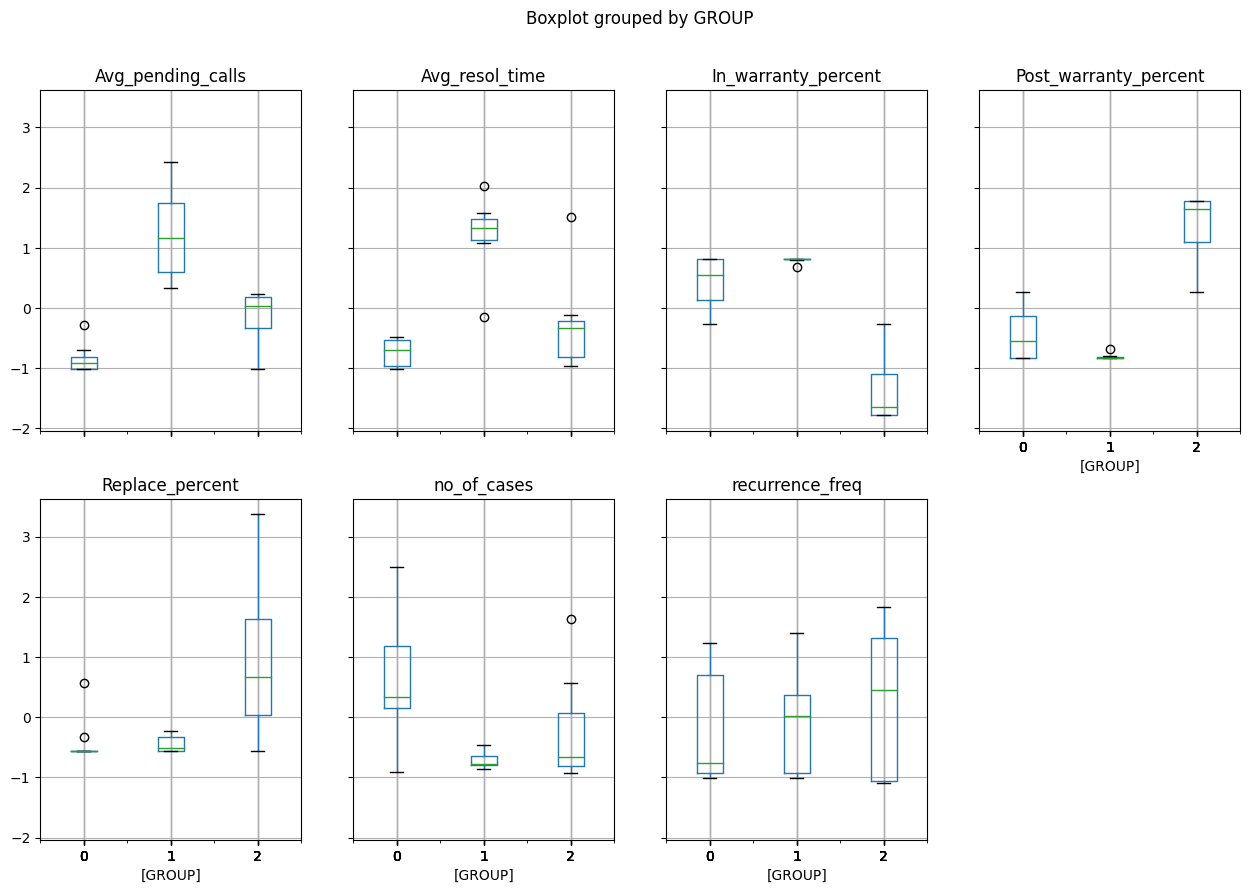

In [28]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [29]:
#  Let us next try with K = 5, the next elbow point

In [30]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,3


In [34]:
final_model=KMeans(5)
KMeans(5).fit(techSuppScaled)
prediction=KMeans(5).fit(techSuppScaled).predict(techSuppScaled)
print(prediction)

[1 3 1 3 2 2 2 1 0 2 2 4 1 2 0 0 4 1 2 0 4 4 4]


c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\OneDrive\Documents\40-ML-going-forward\26-unsupervised-learning-clustering\container\unsupervised-learning-clustering\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
techSuppClust = tech_supp_df.groupby(['GROUP', 'PROBLEM_TYPE'])
techSuppClust.mean()

no_of_cases   
GROUP PROBLEM_TYPE                                             
0     Remote Keys get stuck                            450.0  \
      Unable to connect the App to the device          321.0   
      Unable to operate menu from remote               520.0   
      WIFI connectivity breaks                         290.0   
1     Battery backup does not get fully charged         29.0   
      Battery does not last full 8 hrs                  43.0   
      Cluttered with popup messages                    230.0   
      Fan speed varies at on its own                    78.0   
      Motor noise from the system                      390.0   
2     AC controller sofware missing                    193.0   
      App takes a long time to initialize              165.0   
      Fan swing not working                              5.0   
      Freshner holder stuck                            140.0   
      Temperature control not working                  170.0   
3     AC remote does not  work                          24.0   
      AC stops abruptly                                 47.0   
      App hangs while entring commands                  12.0   
      Factory settings not working                      72.0   
      Forgot mobile app password                        45.0   
      Mobile screen blanks on use of phone              23.0   
      Reinstalling the app hangs the phone              22.0   
4     Main switch does not on                            3.0   
      power chord does not tightly fit                  12.0   

                                                 Avg_pending_calls   
GROUP PROBLEM_TYPE                                                   
0     Remote Keys get stuck                                    1.0  \
      Unable to connect the App to the device                  1.0   
      Unable to operate menu from remote                       1.0   
      WIFI connectivity breaks                                 1.1   
1     Battery backup does not get fully charged                2.2   
      Battery does not last full 8 hrs                         2.1   
      Cluttered with popup messages                            1.3   
      Fan speed varies at on its own                           2.2   
      Motor noise from the system                              1.0   
2     AC controller sofware missing                            1.2   
      App takes a long time to initialize                      1.2   
      Fan swing not working                                    1.0   
      Freshner holder stuck                                    1.7   
      Temperature control not working                          1.3   
3     AC remote does not  work                                 2.8   
      AC stops abruptly                                        3.1   
      App hangs while entring commands                         4.0   
      Factory settings not working                             2.3   
      Forgot mobile app password                               2.3   
      Mobile screen blanks on use of phone                     4.3   
      Reinstalling the app hangs the phone                     3.3   
4     Main switch does not on                                  2.0   
      power chord does not tightly fit                         2.0   

                                                 Avg_resol_time   
GROUP PROBLEM_TYPE                                                
0     Remote Keys get stuck                                 8.0  \
      Unable to connect the App to the device               5.0   
      Unable to operate menu from remote                    7.0   
      WIFI connectivity breaks                             11.0   
1     Battery backup does not get fully charged            45.0   
      Battery does not last full 8 hrs                     56.0   
      Cluttered with popup messages                        23.0   
      Fan speed varies at on its own                       44.0   
      Motor noise from the 

array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

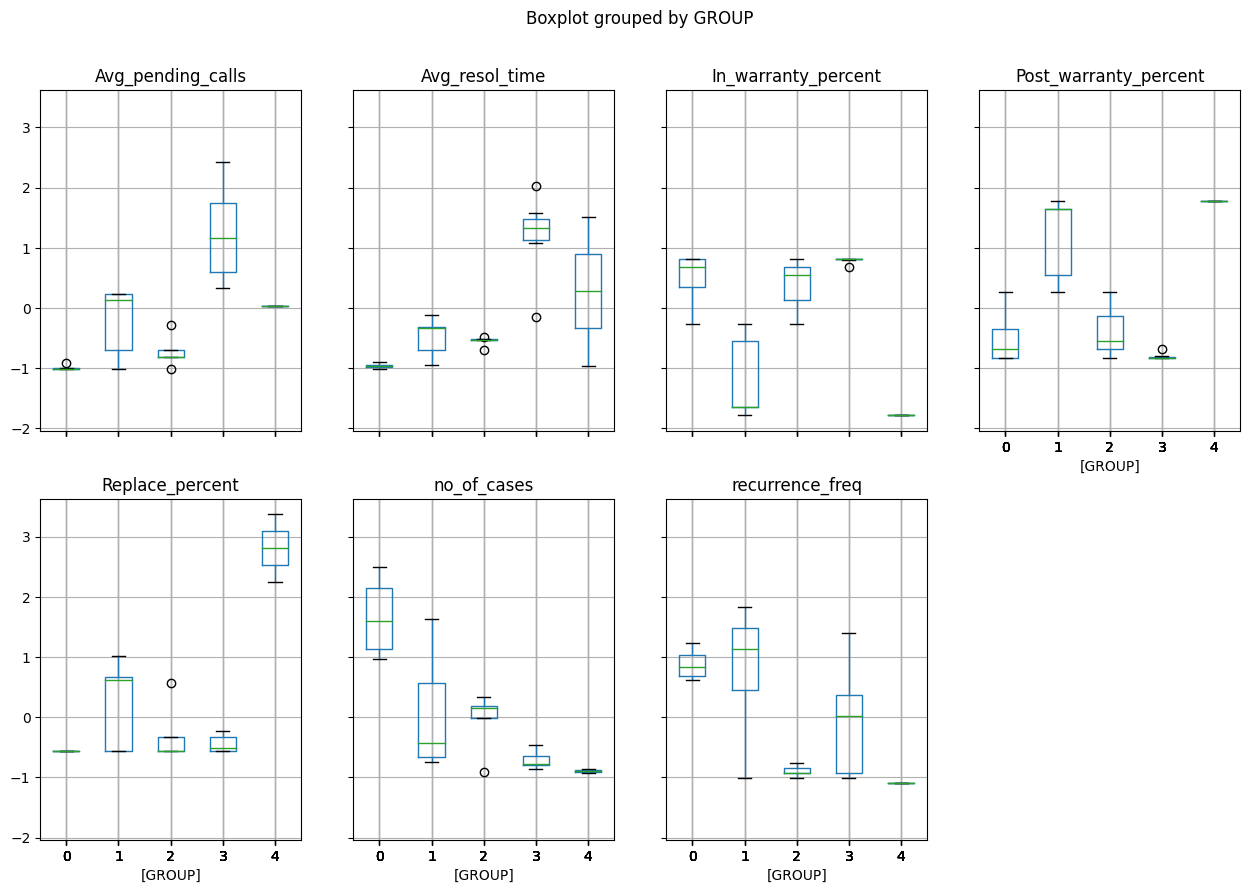

In [32]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))